In [ ]:
import pymc as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

az.style.use('arviz-darkgrid')
filepath = "/content/iris.csv"
df = pd.read_csv(filepath)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
sepal_length_df = df['sepal_length'].values
sepal_width_df = df['sepal_width'].values
petal_length_df = df['petal_length'].values
petal_width_df = df['petal_width'].values
species_df = df['species'].values


Text(0.5, 1.0, 'Scatter Plot (Correlation: 0.82)')

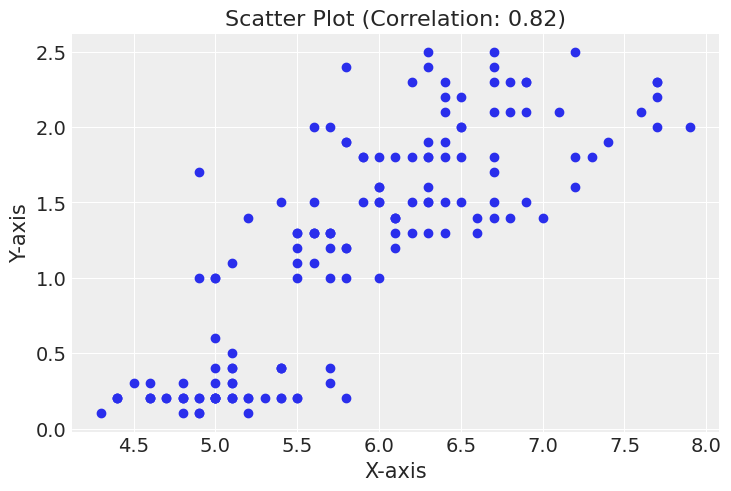

In [ ]:
correlation_coefficient = np.corrcoef(sepal_length_df, petal_width_df)[0, 1]

# Create a scatter plot
plt.scatter(sepal_length_df, petal_width_df)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter Plot (Correlation: {correlation_coefficient:.2f})')
# plt.grid(False)

Text(0.5, 1.0, 'Scatter Plot (Correlation: 0.96)')

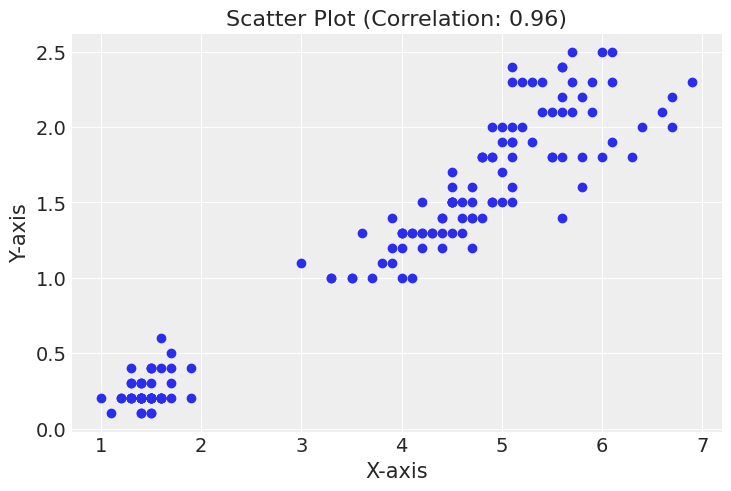

In [ ]:
correlation_coefficient = np.corrcoef(petal_length_df, petal_width_df)[0, 1]

# Create a scatter plot
plt.scatter(petal_length_df, petal_width_df)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter Plot (Correlation: {correlation_coefficient:.2f})')
# plt.grid(False)

In [ ]:
with pm.Model() as model_high:
    α1 = pm.Normal('alp1', mu=0, sigma=10)
    β1 = pm.Normal('bet1', mu=0, sigma=1)
    ϵ1 = pm.HalfCauchy('eps1', 5)
    μ1 = pm.Deterministic('mu1', α1 + β1 * petal_length_df)
    y_pred1 = pm.Normal('y_pred1', mu=μ1, sigma=ϵ1, observed=petal_width_df)
    trace_high = pm.sample(1000, tune=1000)

In [ ]:
with pm.Model() as model_high:
    α2 = pm.Normal('alp2', mu=0, sigma=10)
    β2 = pm.Normal('bet2', mu=0, sigma=1)
    ϵ2 = pm.HalfCauchy('eps2', 5)
    μ2 = pm.Deterministic('mu2', α2 + β2 * sepal_length_df)
    y_pred2 = pm.Normal('y_pred2', mu=μ2, sigma=ϵ2, observed=petal_width_df)
    trace_low = pm.sample(1000, tune=1000)

<Axes: xlabel='alp1', ylabel='bet1'>

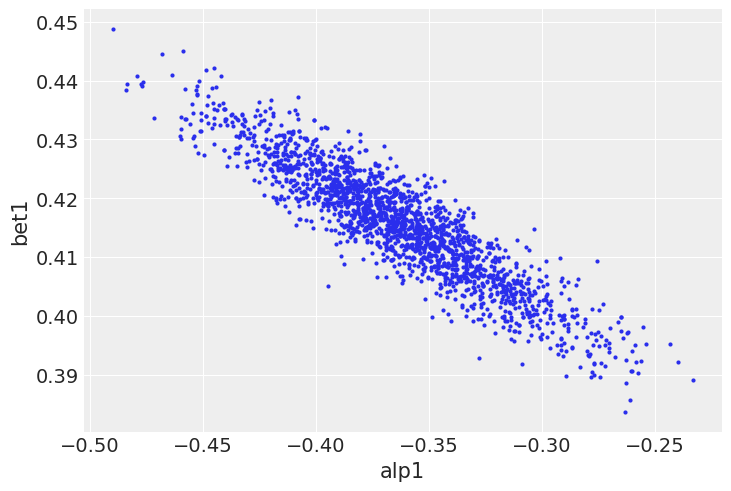

In [ ]:
az.plot_pair(trace_high, var_names=['alp1', 'bet1'])

<Axes: xlabel='alp2', ylabel='bet2'>

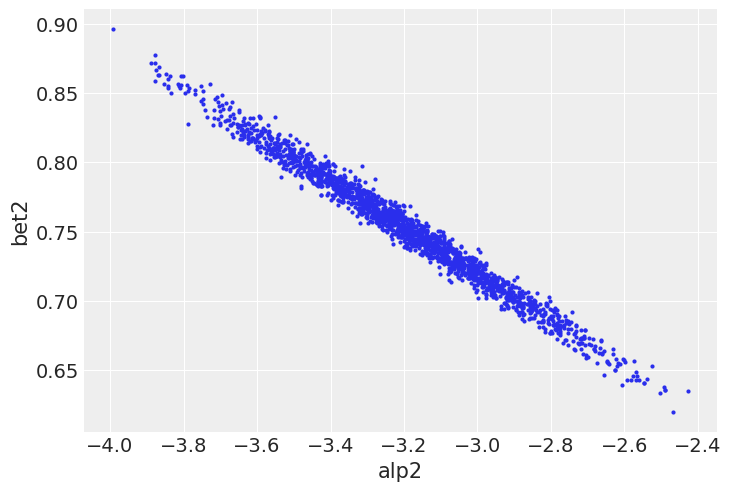

In [ ]:
az.plot_pair(trace_low, var_names=['alp2', 'bet2'])

In [76]:
# Calculate R-squared for model1 (PL as X)
#doesnt work on pymc
with model_high:
  y_pred1 = trace_high['alp1'] + trace_high['bet1'] * petal_length_df
  y_mean = np.mean(petal_width_df)
  ss_total1 = np.sum((petal_width_df - y_mean) ** 2)
  ss_residual1 = np.sum((petal_width_df - y_pred1) ** 2)
  r_squared1 = 1 - (ss_residual1 / ss_total1)
  print(f"R-squared for Model 1: {r_squared1:.4f}")

with model_low:
  # Calculate R-squared for model2 (SL as X)
  y_pred2 = trace_low['alp2'] + trace_low['bet2'] * sepal_length_df
  ss_total2 = np.sum((petal_width_df - y_mean) ** 2)
  ss_residual2 = np.sum((petal_width_df - y_pred2) ** 2)
  r_squared2 = 1 - (ss_residual2 / ss_total2)
  print(f"R-squared for Model 2: {r_squared2:.4f}")

KeyError: ignored